***
# **Housing Price Prediction**
***
Notebook to predict the price of houses, using a USA housing dataset.


### Summary
The aim of this project is to predict house prices using one basic machine learning algorithms such Linear Regression and LCS, and **advanced algorithms** like: Random Forest, SVM, XGBOOST. We will also use regression and statistics tool in our analysis to understand the information with in the dataset. For exploration and analysis univariate, bivariate, and multivariate statistics are performed.

### Results
Random Forest was found to be the better model for predicting house prices. It out performed the regession algorithms with performance accuracy of 85% using R-squared metric. The most important predictor was the overall quality of a house, following the size of above ground living area and the total basement square footage. This project is a first pass to get us quickly to a reasonable good model prototype.

### Index
1. Import Libraries
2. Import and Load Data Set
3. Cleaning <br>
    a. Basic <br>
    b. Advanced <br>
    c. Filling in missing values <br>
4. Exploratory Data Analysis <br>
    a. Univariate Statistics <br>
    b. Plots (Bar chart, scatter) <br>
    c. Heteroscedasticity <br>
    d. Biavariate Statistics <br>
    e. Multivariate Statistics <br>
    f. Correlation matrix | heatmap <br>
5. Preprocessing
6. Modeling & Testing
    a. Linear Regression <br>
    b. Random Forest <br>
    c. XGBOOST <br>
    d. SVM <br>
7. Evaluation

## **I) Import Libraries**
In this section we import the libraries that will be used throughout the notebook.

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

## **II) Import and Load Dataset**
In this section we load the full housing dataset using pandas .read_csv().

In [2]:
data = pd.read_csv('http://www.ishelp.info/data/housing_full.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Saving as CSV

In [3]:
data.to_csv('houseData.csv') 

## **II) Preprocessing**
In this section we prepare and explore our data to see if there are missing, irrelevant, or incorrect data.

### a) Describing principal dataset features.

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### b) Checking for and return missing values.

In [5]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

We can see that there are many fields that have missing values.

In [6]:
# Return rows with missing values
data[data.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


We can also see that there are many rows with missing data.

### b) Identifing Outliers from `'SalePrice'`

In [7]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

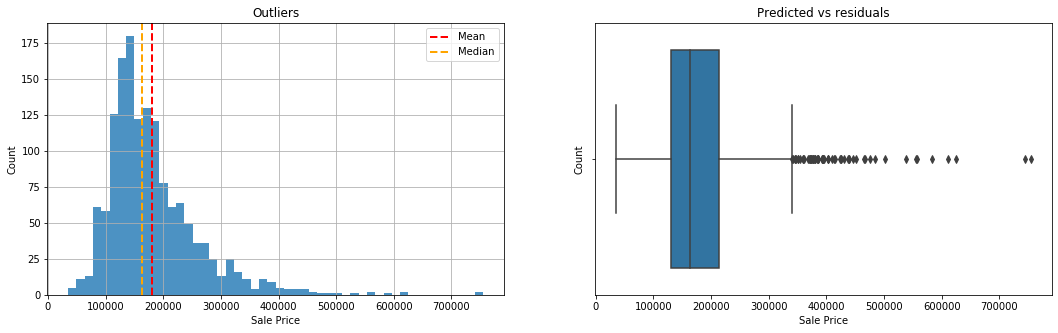

In [8]:
plt.figure(figsize=(18,5))

# Visualizing outliers
ax1 = plt.subplot(1,2,1)
ax1 = data['SalePrice'].hist(bins=50, alpha=0.8)

plt.axvline(data['SalePrice'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data['SalePrice'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
ax1.set_title("Outliers") 
ax1.set_xlabel('Sale Price')
ax1.set_ylabel('Count')
plt.legend()

# Checking residuals
ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(data['SalePrice'], orient='h')
ax2.set_title("Predicted vs residuals")
ax2.set_xlabel("Sale Price")
ax2.set_ylabel("Count")
plt.show()

###### **Figure 1.** Outliers histogram and box plot of SalePrice.

## III) Data Cleaning
We proceed to clean the dataset for the analysis. For this we will will apply two methods on corresponding datasets. One dataset will be subjected to `basic_Clean` and the other datset will be modified by the `Complete Clean` Method (subsecuent section).

In [9]:
houseDataMod = pd.read_csv('http://www.ishelp.info/data/housing_full.csv')
HDat = data

### a) Define Basic Cleaning function

In [10]:
def basic_Clean(df):
    df.drop(columns = ['Id'], inplace = True)
    df.dropna(axis = 1, inplace = True)

    for col in df:
        if col[0].isdigit():
            nums = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
            df.rename(columns={col:nums[int(col[0])] + '_' + col}, inplace=True)
    
    return df

basic_Clean(HDat)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,three_3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


### b) Executing Complete Cleaning Method
This method will be applied to a diferent dataset and will involve removing extreme outliers, and filling in missing data, not just eliminating valueble information.

#### Outlier rejection function at certain standard deviation

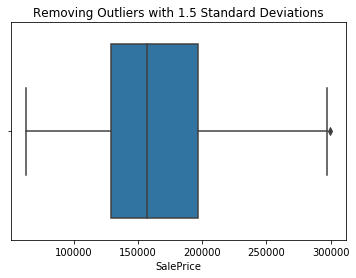

In [11]:
def reject_outliers(df, m = 1.5):    # Create function to reject outliers, default stdev is 1.5
    return df[abs(df - np.mean(df)) < m * np.std(df)]

# Box plot showing the outliers removed with m = 1.5
sns.boxplot(reject_outliers(houseDataMod['SalePrice']), orient='h').set_title('Removing Outliers with 1.5 Standard Deviations')
plt.show()

###### **Figure 2.** Box plot of SalePrice with out putliers at 1.5 std.

In [12]:
# Make series of mask
mask = reject_outliers(houseDataMod['SalePrice']).tolist()
mask[0:20]

# Mask as Boolean
mask_results = houseDataMod['SalePrice'].isin(mask)[0:20].tolist()
#mask_results
outliers_dict = dict(zip(mask, mask_results))
outliers_dict

# New dataframe based off mask
houseDataMod = houseDataMod[~houseDataMod['SalePrice'].isin(mask) == False]

In [13]:
# Prince new 'saleprice' stat data
houseDataMod['SalePrice'].describe()

count      1330.000000
mean     165529.114286
std       50948.464069
min       62383.000000
25%      128912.500000
50%      157000.000000
75%      196875.000000
max      299800.000000
Name: SalePrice, dtype: float64

#### FILLING IN MISSING DATA

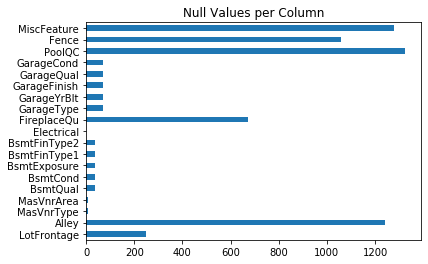

In [14]:
# Columns with null (np.nan) values
nan_col_list = houseDataMod.columns[houseDataMod.isnull().any()].tolist()

# Sum of nan values of each column
nulls = houseDataMod[nan_col_list].isnull().sum()
nulls.plot(kind='barh', title='Null Values per Column')
plt.show()


###### **Figure 3.** Box plot of null values.

In [15]:
# Find how many missing values and percentage missing in each column
print('Missing data in each dataframe column:')
for col in houseDataMod.columns:
    missing_data = len(houseDataMod) - houseDataMod[col].count()
    if (missing_data > 0 or missing_data =='NaN'):
         print(col, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(houseDataMod))) * 
             100, 3)), '% of total')

Missing data in each dataframe column:
LotFrontage : 249 missing values is 18.722 % of total
Alley : 1242 missing values is 93.383 % of total
MasVnrType : 7 missing values is 0.526 % of total
MasVnrArea : 7 missing values is 0.526 % of total
BsmtQual : 35 missing values is 2.632 % of total
BsmtCond : 35 missing values is 2.632 % of total
BsmtExposure : 36 missing values is 2.707 % of total
BsmtFinType1 : 35 missing values is 2.632 % of total
BsmtFinType2 : 36 missing values is 2.707 % of total
Electrical : 1 missing values is 0.075 % of total
FireplaceQu : 672 missing values is 50.526 % of total
GarageType : 72 missing values is 5.414 % of total
GarageYrBlt : 72 missing values is 5.414 % of total
GarageFinish : 72 missing values is 5.414 % of total
GarageQual : 72 missing values is 5.414 % of total
GarageCond : 72 missing values is 5.414 % of total
PoolQC : 1324 missing values is 99.549 % of total
Fence : 1058 missing values is 79.549 % of total
MiscFeature : 1278 missing values is 96.

### Filling in Missing Data

In [16]:
# Build a list of columns where NaN should be a string 'NA'
col_na = ['MiscFeature',
          'Fence',
          'PoolQC',
          'GarageCond',
          'GarageQual',
          'GarageFinish',
          'GarageType',
          'FireplaceQu',
          'BsmtFinType1',
          'BsmtFinType2',
          'BsmtExposure',
          'Alley']

houseDataMod[col_na] = houseDataMod[col_na].fillna('NA')
print(houseDataMod.shape)

(1330, 81)


That gets rid of all the NaN values associated with pandas importing the 'NA' string as NaN



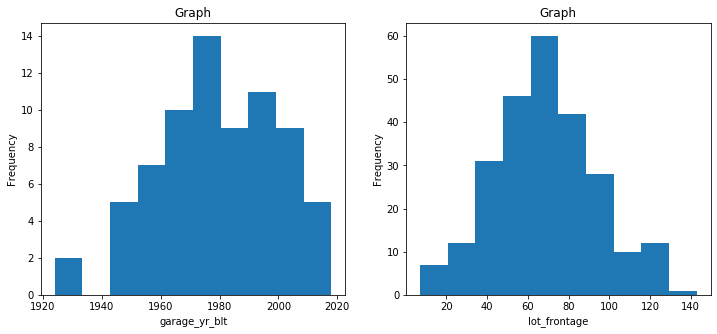

In [17]:
# Function to make random distribution based on existing data
def make_randoms(df, col):
    return np.random.normal(df[col].mean(),
                            scale=df[col].std(),
                            size=df[col].isnull().sum()).astype(int)


# Use random number generator to create a series of numbers based on 'garage_yr_blt' statistics
garage_yr_blt_rand = make_randoms(houseDataMod,'GarageYrBlt')

# Use random number generator to create a series of numbers based on 'LotFrontage' statistics
lot_frontage_rand = make_randoms(houseDataMod,'LotFrontage')

plt.figure(figsize=(12,5))
# Plot the random distribution of the 'garage_yr_blt' column
ax1 = plt.subplot(1,2,1)
ax1 = plt.hist(garage_yr_blt_rand)
plt.title('Graph') 
plt.xlabel('garage_yr_blt')
plt.ylabel('Frequency')

# Plot the random distribution of the 'LotFrontage' column
ax2 = plt.subplot(1,2,2)
ax2 = plt.hist(lot_frontage_rand)
plt.title('Graph') 
plt.xlabel('lot_frontage')
plt.ylabel('Frequency')

plt.show()

###### **Figure 4.** Plot of new values.

In [18]:
# Replace the NaNs with the random data using this method because I don't
houseDataMod['LotFrontage'] = houseDataMod['LotFrontage'].fillna('x')
houseDataMod['GarageYrBlt'] = houseDataMod['GarageYrBlt'].fillna('x')
houseDataMod.loc[houseDataMod['LotFrontage']=='x','LotFrontage'] = lot_frontage_rand
houseDataMod.loc[houseDataMod['GarageYrBlt']=='x','GarageYrBlt'] = garage_yr_blt_rand

# Drop the rest
print('Before: ', houseDataMod.shape)
houseDataMod = houseDataMod.dropna()
print('After: ', houseDataMod.shape)

# Verify that all null values are gone
nan_col_list = houseDataMod.columns[houseDataMod.isnull().any()].tolist()
nan_col_list = houseDataMod.columns[houseDataMod.isnull().any()].tolist()
nulls = houseDataMod[nan_col_list].isnull().sum()

print(nan_col_list, nulls)

Before:  (1330, 81)
After:  (1287, 81)
[] Series([], dtype: float64)


### Create Dummy Variables for Categorical Columns

In [19]:
# Re-index houseDataMod so indices match 
houseDataMod.reset_index(inplace=True)
cat_columns = houseDataMod.select_dtypes(include=[object]).columns.tolist()

dummies_df = pd.get_dummies(houseDataMod[cat_columns],prefix_sep='_',drop_first=False)
houseDataMod.drop(cat_columns,axis=1,inplace=True)

#houseDataMod.head()
#dummies_df.head()

### Split and scale the Data into a Train and Test Set

In [20]:
from sklearn.model_selection import train_test_split

XX = houseDataMod.drop('SalePrice',axis=1)
yy = houseDataMod['SalePrice']
X_train1, X_test1, y_train1, y_test1 = train_test_split(XX, yy, random_state=42)

for dataset in [X_train1, X_test1, y_train1, y_test1]:
    print(dataset.shape)


from sklearn.preprocessing import StandardScaler
# Instantiate
scaler = StandardScaler()
# fit_transform
X_train_scaled1 = scaler.fit_transform(X_train1)
# transform
X_test_scaled1 = scaler.transform(X_test1)

print(scaler.mean_[1], scaler.scale_[1])

(965, 36)
(322, 36)
(965,)
(322,)
739.9751295336788 424.10750104007207


#### Save Current Data

pd.to_pickle(houseDataMod, '../data/houseDataMod.pkl')
pd.to_pickle(X, '../data/X.pkl')
pd.to_pickle(y, '../data/y.pkl')
pd.to_pickle(X_train, '../data/X_train.pkl')
pd.to_pickle(X_test, '../data/X_test.pkl')
pd.to_pickle(y_train, '../data/y_train.pkl')
pd.to_pickle(y_test, '../data/y_test.pkl')
pd.to_pickle(X_train_scaled, '../data/X_train_scaled.pkl')
pd.to_pickle(X_test_scaled, '../data/X_test_scaled.pkl')

## IV) Data Exploration and Analysis
#### A) Univariate Statistics
We use Univariate analysis to explore each variable in a data set, separately. We look at the range of values, as well as the central tendency of the values. This way we can describe the patterns of response to the variable.

In [21]:
def unistats(ds):
    output_data = pd.DataFrame(columns = ['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mean', 'Mode', 'Min', '25%', 'Median', '75%', 'Max', 'Std','Skew', 'Kurt'])
    for col in ds:
        if pd.api.types.is_numeric_dtype(ds[col]):
            output_data.loc[col] = [ds[col].count(), ds[col].isnull().sum(), ds[col].nunique(), ds[col].dtype, pd.api.types.is_numeric_dtype(ds[col]),
                                    ds[col].mode().values[0], ds[col].mean(), ds[col].min(), ds[col].quantile(0.25), ds[col].median(), ds[col].quantile(0.75),
                                    ds[col].max(), ds[col].std(), ds[col].skew(), ds[col].kurt()]
            
        else:
            output_data.loc[col] = [ds[col].count(), ds[col].isnull().sum(), ds[col].nunique(), ds[col].dtype, pd.api.types.is_numeric_dtype(ds[col]), 
                                    ds[col].mode().values[0], '-', '-', '-', '-', '-', '-', '-', '-', '-']

    return output_data.sort_values(by=['Numeric', 'Skew', 'Unique'], ascending = False)

#test the function
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
unistats(HDat)

,Count,Missing,Unique,Dtype,Numeric,Mean,Mode,Min,25%,Median,75%,Max,Std,Skew,Kurt
MiscVal,1460,0,21,int64,True,0,43.489,0,0,0,0,15500,496.123,24.4768,701.003
PoolArea,1460,0,8,int64,True,0,2.7589,0,0,0,0,738,40.1773,14.8284,223.268
LotArea,1460,0,1073,int64,True,7200,10516.8,1300,7553.5,9478.5,11601.5,215245,9981.26,12.2077,203.243
three_3SsnPorch,1460,0,20,int64,True,0,3.40959,0,0,0,0,508,29.3173,10.3043,123.662
LowQualFinSF,1460,0,24,int64,True,0,5.84452,0,0,0,0,572,48.6231,9.01134,83.2348
KitchenAbvGr,1460,0,4,int64,True,1,1.04658,0,1,1,1,3,0.220338,4.4884,21.5324
BsmtFinSF2,1460,0,144,int64,True,0,46.5493,0,0,0,0,1474,161.319,4.25526,20.1133
ScreenPorch,1460,0,76,int64,True,0,15.061,0,0,0,0,480,55.7574,4.12221,18.4391
BsmtHalfBath,1460,0,3,int64,True,0,0.0575342,0,0,0,0,2,0.238753,4.1034,16.3966
EnclosedPorch,1460,0,120,int64,True,0,21.9541,0,0,0,0,552,61.1191,3.08987,10.4308


### B) Plots
In this section we define our bar, scatter, and heat map plot functions. They will be used so we can proceede with our EDA.

#### Bar Charts

'AllPub' n -1459; 'NoSeWa' n-1 no test was preformed


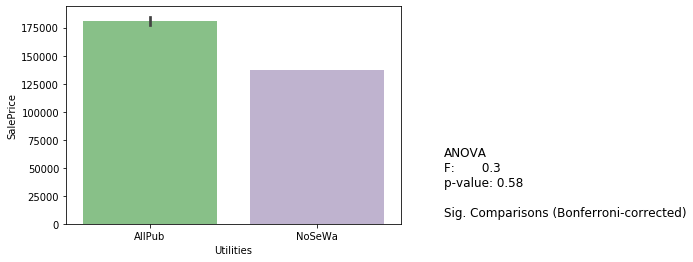

In [22]:
def bar_Chart(df, feature, label):
    #import pandas as pd
    #import seaborn as sns
    #from scipy import stats 
    #from matplotlib import pyplot as plt
    #from scipy import stats
    
    groups = df[feature].unique()
    dfGrouped = df.groupby(feature)
    groupLabels = []
    for g in groups:
        gList = dfGrouped.get_group(g)
        groupLabels.append(gList[label])
        
    #Calculate ANOVA
    oneway = stats.f_oneway(*groupLabels)
        
    #T-test with bonferroni correction for p-value threshold
    uniqueGroups = df[feature].unique()
    ttests= []
        
    for i, group in enumerate(uniqueGroups):
        for i2, group2 in enumerate(uniqueGroups):
            if i2 > i:
                type1 = df[df[feature] == group]
                type2 = df[df[feature] == group2]
                    
                #there must be more than 1 case in order to preform a ttest
                    
                if len(type1[label]) < 2 or len(type2[label]) < 2:
                    print("'" + group + "' n -" + str(len(type1)) + "; '" + group2 +"' n-" + str(len(type2)) + " no test was preformed")
                else:
                    t, p = stats.ttest_ind(type1[label], type2[label])
                    ttests.append([group, group2, t.round(4), p.round(4)])
                    
    if len(ttests) > 0:
        pThreshold = 0.05 / len(ttests) #beonferroni-corrected p-vañue determined
    else: 
        pThreshold = 0.05
        
    #derescriptyions
    #calculatina the regression line
    textstr = 'ANOVA' + '\n'
    textstr += 'F:       ' + str(oneway[0].round(2)) + '\n'
    textstr += 'p-value: ' + str(oneway[1].round(2)) + '\n\n'
    textstr += 'Sig. Comparisons (Bonferroni-corrected)' + '\n' 
        
    for ttest in ttests:
        if ttest[3] <= pThreshold:
            textstr += ttest[0] + '-' + ttest[1] + ': t-' + str(ttest[2]) + ', p:' + str(ttest[3]) + '\n'
    ax = sns.barplot(df[feature], df[label], palette='Accent')
    ax.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
    plt.show()

bar_Chart(HDat, 'Utilities', 'SalePrice')
            

###### **Figure 5.** *Bar plot function test.*

#### Heteroscedasticity
While heteroscedasticity can cause our coefficient estimates to be less precise. Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

In [23]:
def heteroscedasticity(df, feature, label):
    #import statsmodels.api as sm
    #import pandas as pd
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    from statsmodels.formula.api import ols
    
    model = ols(formula=(label + '~' + feature), data=df).fit()
    output = pd.DataFrame(columns = ['LM Stat', 'LM p-Value', 'F-stat', 'F p-value'])
    
    try:
        whiteTest = het_white(model.resid, model.model.exog)
        output.loc['White'] = whiteTest
    except:
        print('Unable to run white test of hetroscedasticity')
        
    bpTest = het_breuschpagan(model.resid, model.model.exog)
    output.loc['Br-Pa'] = bpTest
    
    return output.round(3)
    

#### Scatter Plot

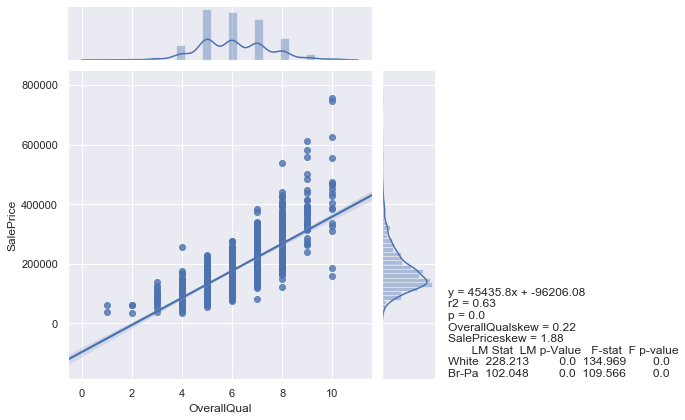

In [24]:
def scatter(feature, label):
    
    #calculatina the regression line
    m, b, r, p, err = stats.linregress(feature, label)
    textstr = 'y = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
    textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
    textstr += 'p = ' + str(round(p, 2)) + '\n'
    textstr += str(feature.name) + 'skew = ' + str(round(feature.skew(), 2)) + '\n' 
    textstr += str(label.name) + 'skew = ' + str(round(label.skew(), 2)) + '\n' 
    textstr += str(heteroscedasticity(pd.DataFrame(label).join(pd.DataFrame(feature)), feature.name, label.name))
    
    sns.set(color_codes = True )
    ax = sns.jointplot(feature, label, kind = 'reg') 
    ax.fig.text(1, 0.114, textstr, fontsize=12, transform=plt.gcf().transFigure)
    plt.show()

    
scatter(HDat.OverallQual, HDat.SalePrice)

###### **Figure 6.** *Scatter plot function test.*

Heteroscedasticity tends to produce p-values that are smaller than they should be, which is something to avoid in DS. Heteroscedasticity increases the variance of the coefficient estimates but the Ordanary Least Squares procedure does not detect this increase. Ordanary Least Squares calculates the t-values and F-values using an underestimated amount of variance.

### C) HEATMAP

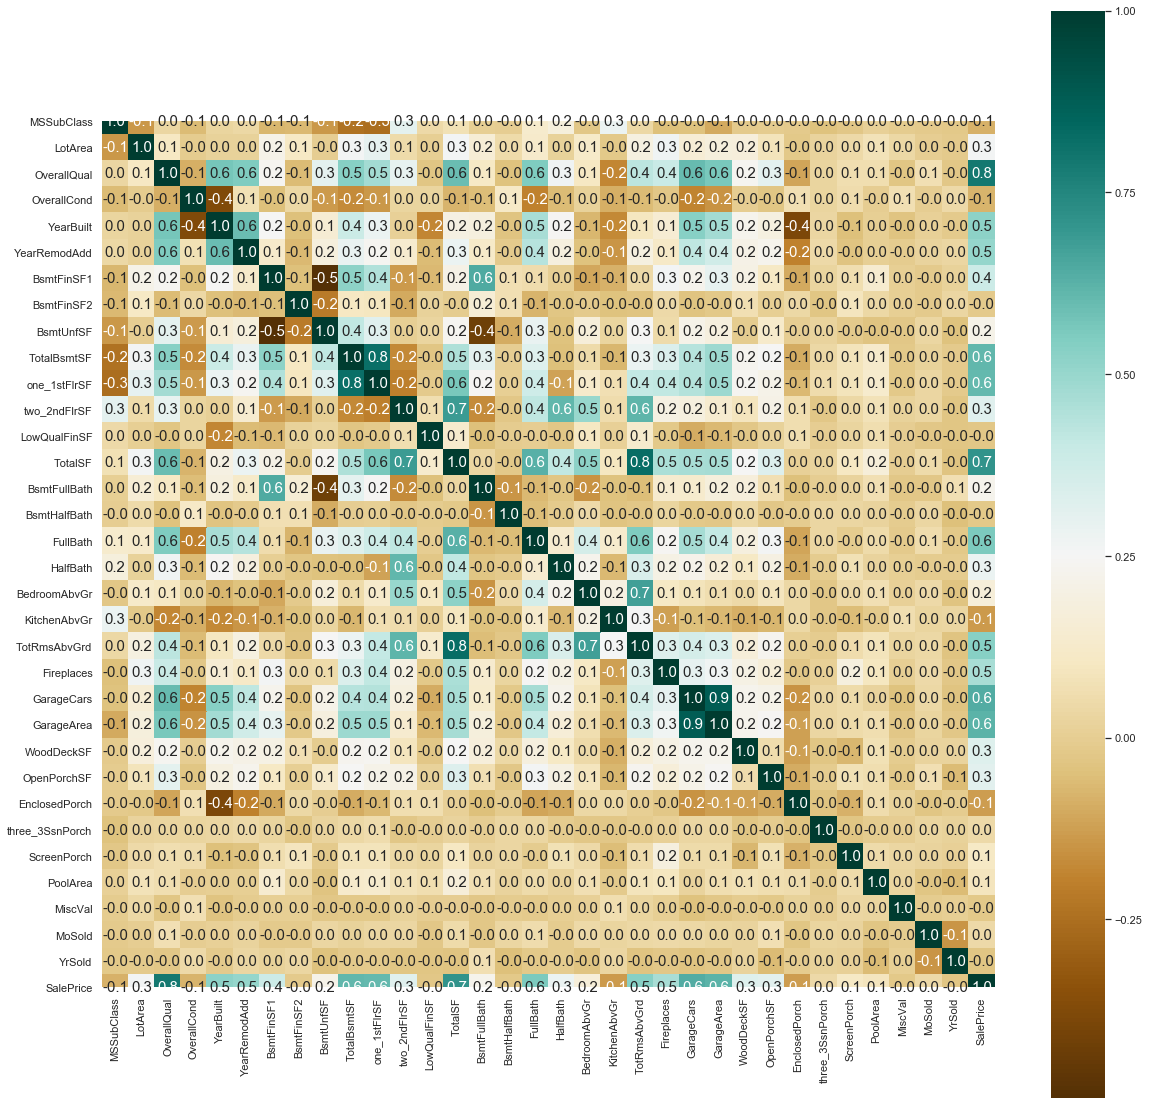

In [25]:
corr = HDat.corr()
corr.shape

plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='BrBG')

###### **Figure 7.** *Correlation Matrix plot test.*

### D) Bivariate Statistics.
In Bivariate analysis we aim to understand the relationship between two variables x and y. In this section of the notebook we the following processes: 
* Numeric to numeric: Correlation.
* Numeric to categorical: One way ANOVA (3+ groups) or t-test (2-groups).
* Categorical to categorical: Chi-Square.

#### ANOVA Function

In [26]:
def anova(df, feature, label):
    #from scipy import stats
    
    groups = df[feature].unique()
    dfGrouped = df.groupby(feature)
    groupLabels = []
    for g in groups:
        gList = dfGrouped.get_group(g)
        groupLabels.append(gList[label])
        
    return stats.f_oneway(*groupLabels)
        

#### Bivariate Stats Function

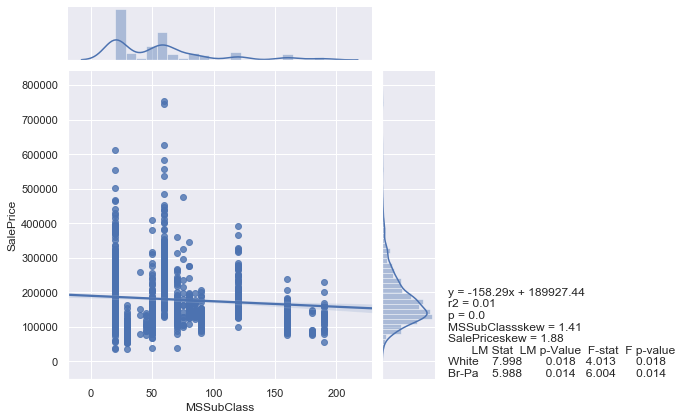

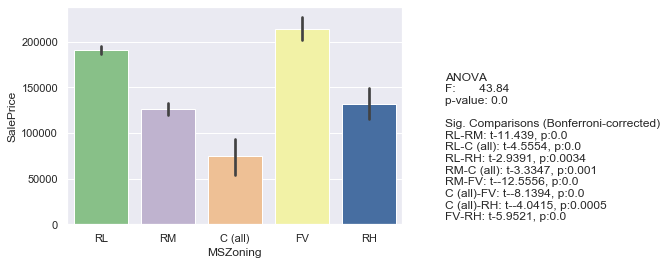

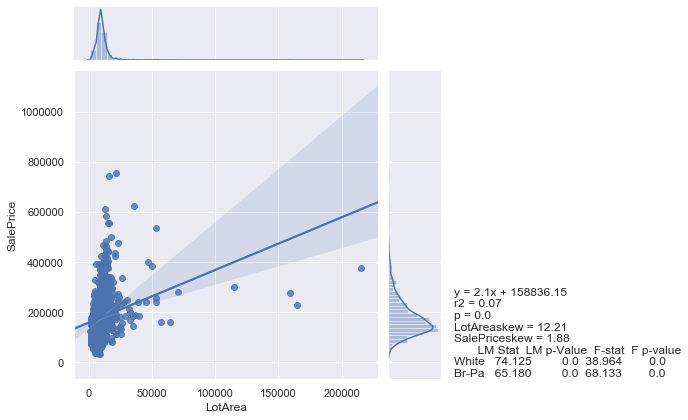

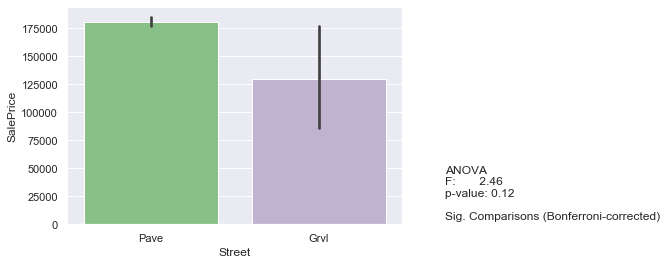

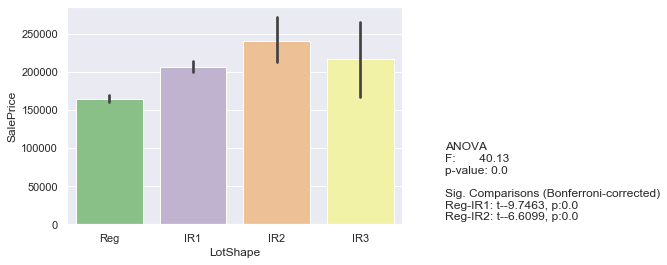

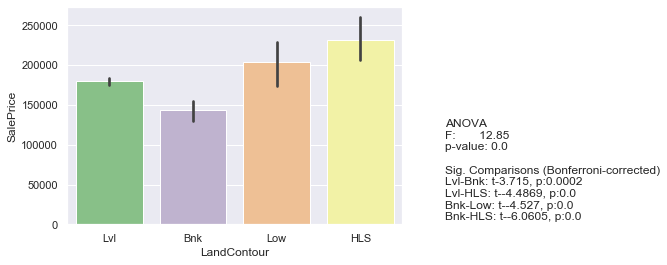

'AllPub' n -1459; 'NoSeWa' n-1 no test was preformed


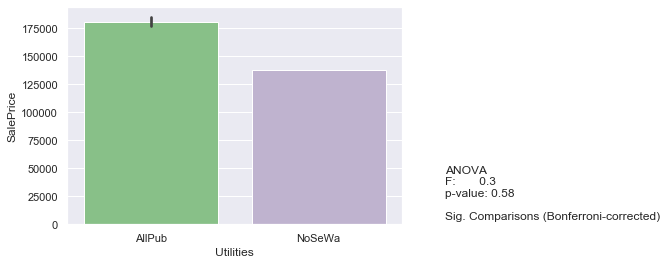

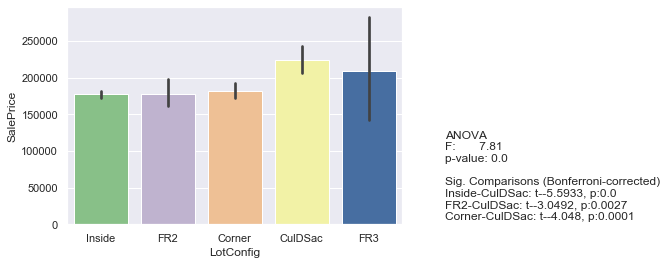

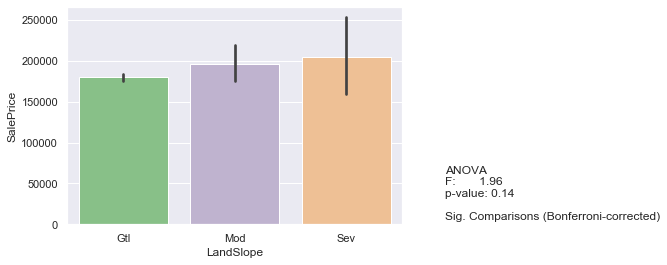

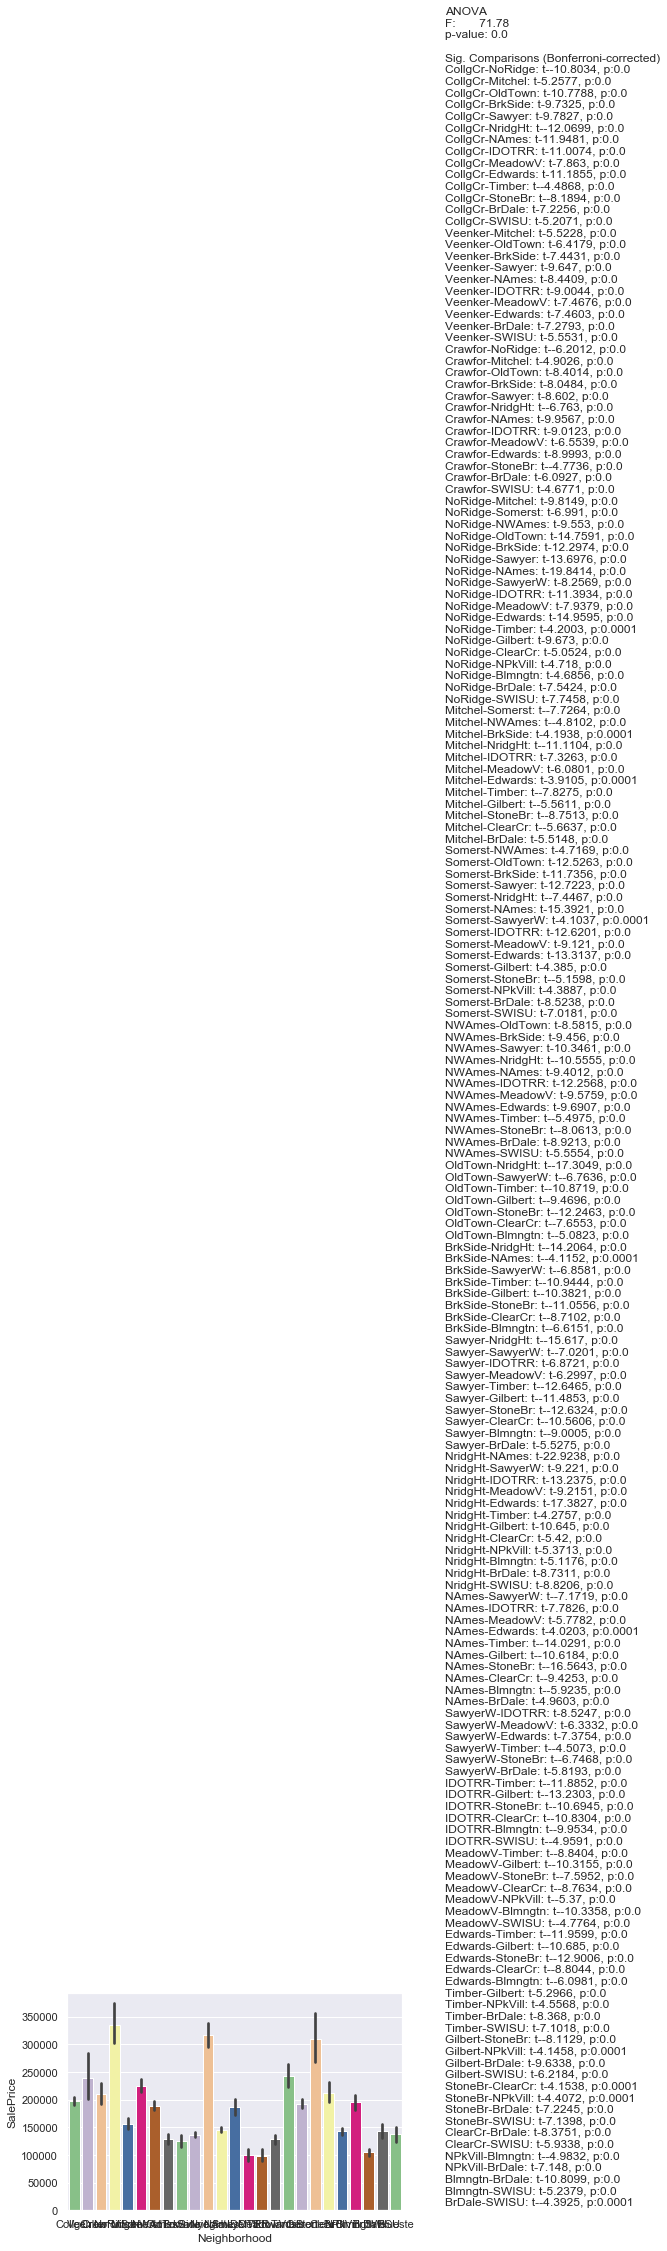

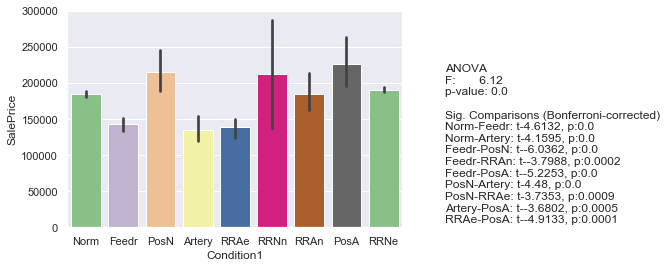

'Norm' n -1445; 'PosA' n-1 no test was preformed
'Norm' n -1445; 'RRAn' n-1 no test was preformed
'Norm' n -1445; 'RRAe' n-1 no test was preformed
'Artery' n -2; 'PosA' n-1 no test was preformed
'Artery' n -2; 'RRAn' n-1 no test was preformed
'Artery' n -2; 'RRAe' n-1 no test was preformed
'RRNn' n -2; 'PosA' n-1 no test was preformed
'RRNn' n -2; 'RRAn' n-1 no test was preformed
'RRNn' n -2; 'RRAe' n-1 no test was preformed
'Feedr' n -6; 'PosA' n-1 no test was preformed
'Feedr' n -6; 'RRAn' n-1 no test was preformed
'Feedr' n -6; 'RRAe' n-1 no test was preformed
'PosN' n -2; 'PosA' n-1 no test was preformed
'PosN' n -2; 'RRAn' n-1 no test was preformed
'PosN' n -2; 'RRAe' n-1 no test was preformed
'PosA' n -1; 'RRAn' n-1 no test was preformed
'PosA' n -1; 'RRAe' n-1 no test was preformed
'RRAn' n -1; 'RRAe' n-1 no test was preformed


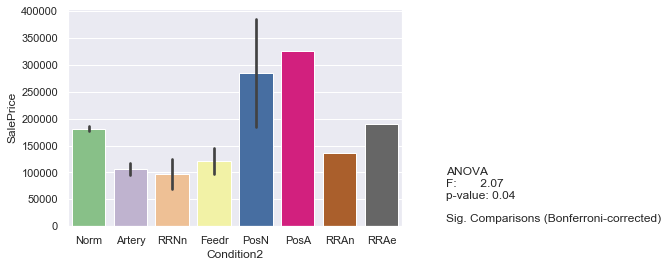

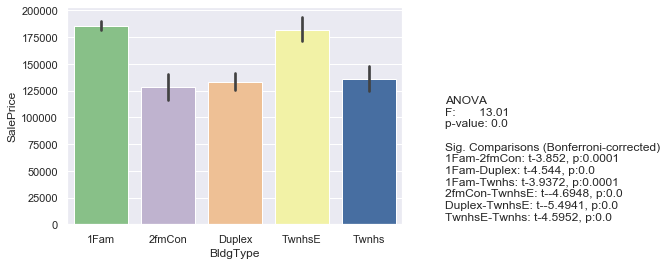

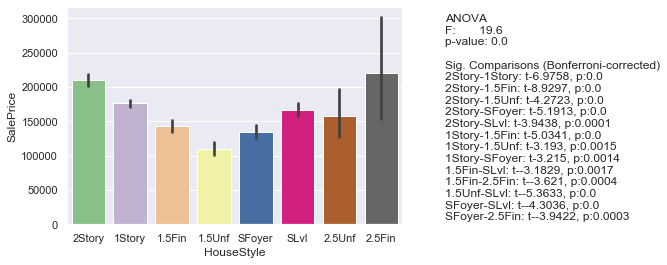

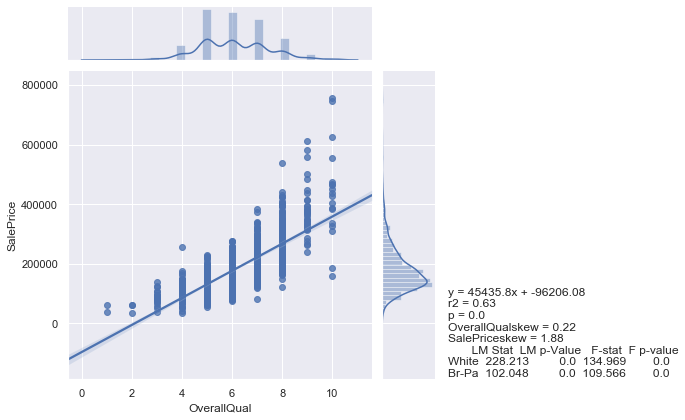

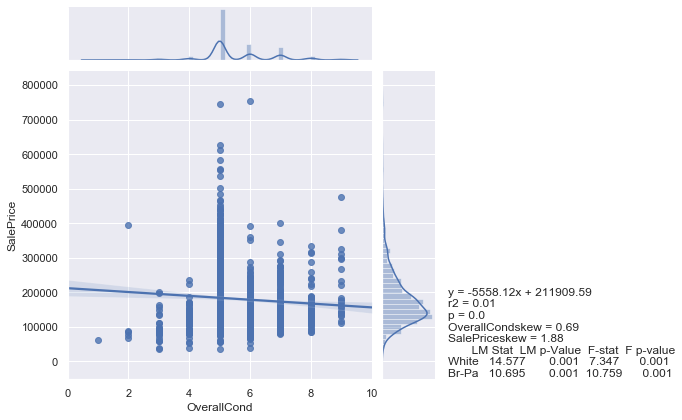

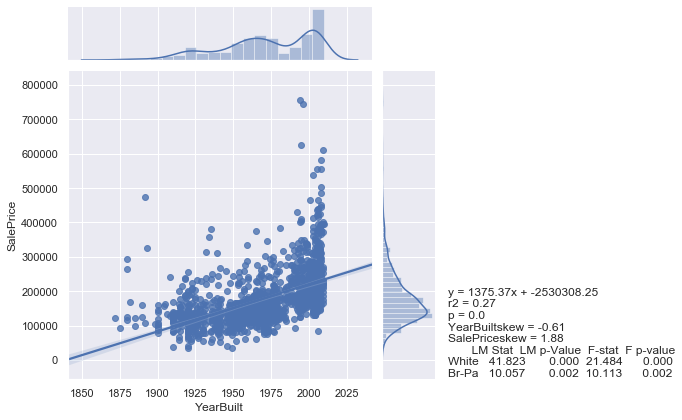

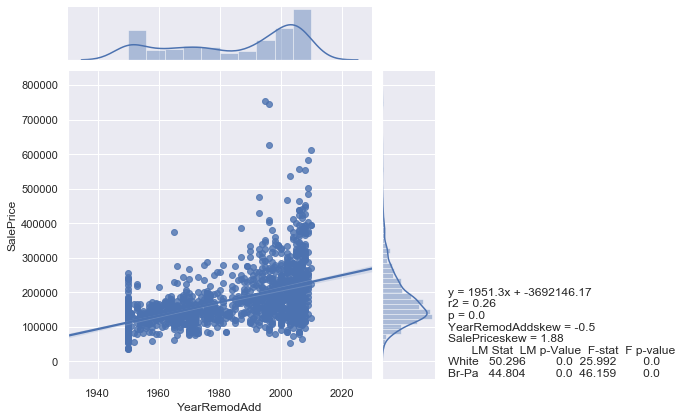

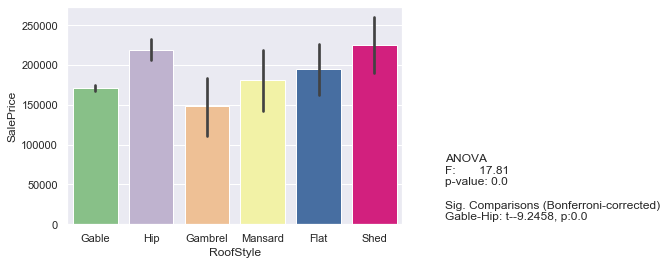

'CompShg' n -1434; 'Metal' n-1 no test was preformed
'CompShg' n -1434; 'Membran' n-1 no test was preformed
'CompShg' n -1434; 'Roll' n-1 no test was preformed
'CompShg' n -1434; 'ClyTile' n-1 no test was preformed
'WdShngl' n -6; 'Metal' n-1 no test was preformed
'WdShngl' n -6; 'Membran' n-1 no test was preformed
'WdShngl' n -6; 'Roll' n-1 no test was preformed
'WdShngl' n -6; 'ClyTile' n-1 no test was preformed
'Metal' n -1; 'WdShake' n-5 no test was preformed
'Metal' n -1; 'Membran' n-1 no test was preformed
'Metal' n -1; 'Tar&Grv' n-11 no test was preformed
'Metal' n -1; 'Roll' n-1 no test was preformed
'Metal' n -1; 'ClyTile' n-1 no test was preformed
'WdShake' n -5; 'Membran' n-1 no test was preformed
'WdShake' n -5; 'Roll' n-1 no test was preformed
'WdShake' n -5; 'ClyTile' n-1 no test was preformed
'Membran' n -1; 'Tar&Grv' n-11 no test was preformed
'Membran' n -1; 'Roll' n-1 no test was preformed
'Membran' n -1; 'ClyTile' n-1 no test was preformed
'Tar&Grv' n -11; 'Roll' n-1

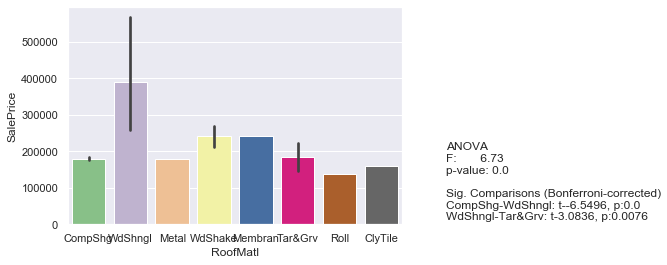

'VinylSd' n -515; 'AsphShn' n-1 no test was preformed
'VinylSd' n -515; 'ImStucc' n-1 no test was preformed
'VinylSd' n -515; 'CBlock' n-1 no test was preformed
'MetalSd' n -220; 'AsphShn' n-1 no test was preformed
'MetalSd' n -220; 'ImStucc' n-1 no test was preformed
'MetalSd' n -220; 'CBlock' n-1 no test was preformed
'Wd Sdng' n -206; 'AsphShn' n-1 no test was preformed
'Wd Sdng' n -206; 'ImStucc' n-1 no test was preformed
'Wd Sdng' n -206; 'CBlock' n-1 no test was preformed
'HdBoard' n -222; 'AsphShn' n-1 no test was preformed
'HdBoard' n -222; 'ImStucc' n-1 no test was preformed
'HdBoard' n -222; 'CBlock' n-1 no test was preformed
'BrkFace' n -50; 'AsphShn' n-1 no test was preformed
'BrkFace' n -50; 'ImStucc' n-1 no test was preformed
'BrkFace' n -50; 'CBlock' n-1 no test was preformed
'WdShing' n -26; 'AsphShn' n-1 no test was preformed
'WdShing' n -26; 'ImStucc' n-1 no test was preformed
'WdShing' n -26; 'CBlock' n-1 no test was preformed
'CemntBd' n -61; 'AsphShn' n-1 no test w

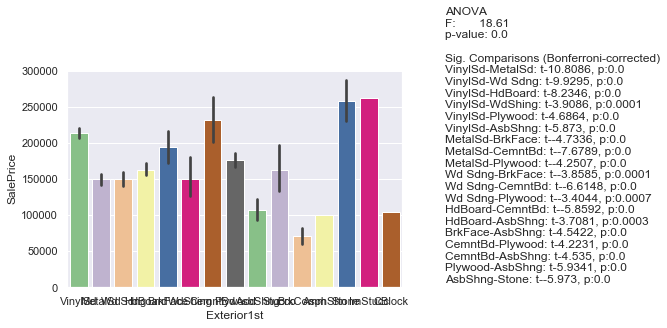

'VinylSd' n -504; 'Other' n-1 no test was preformed
'VinylSd' n -504; 'CBlock' n-1 no test was preformed
'MetalSd' n -214; 'Other' n-1 no test was preformed
'MetalSd' n -214; 'CBlock' n-1 no test was preformed
'Wd Shng' n -38; 'Other' n-1 no test was preformed
'Wd Shng' n -38; 'CBlock' n-1 no test was preformed
'HdBoard' n -207; 'Other' n-1 no test was preformed
'HdBoard' n -207; 'CBlock' n-1 no test was preformed
'Plywood' n -142; 'Other' n-1 no test was preformed
'Plywood' n -142; 'CBlock' n-1 no test was preformed
'Wd Sdng' n -197; 'Other' n-1 no test was preformed
'Wd Sdng' n -197; 'CBlock' n-1 no test was preformed
'CmentBd' n -60; 'Other' n-1 no test was preformed
'CmentBd' n -60; 'CBlock' n-1 no test was preformed
'BrkFace' n -25; 'Other' n-1 no test was preformed
'BrkFace' n -25; 'CBlock' n-1 no test was preformed
'Stucco' n -26; 'Other' n-1 no test was preformed
'Stucco' n -26; 'CBlock' n-1 no test was preformed
'AsbShng' n -20; 'Other' n-1 no test was preformed
'AsbShng' n -2

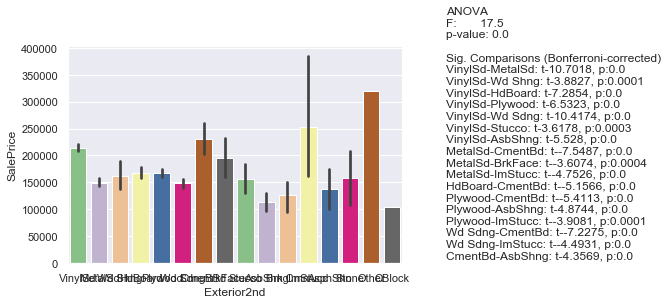

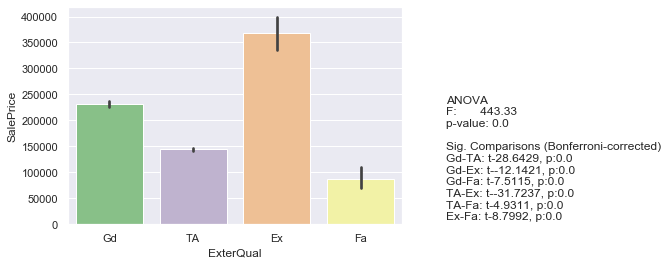

'TA' n -1282; 'Po' n-1 no test was preformed
'Gd' n -146; 'Po' n-1 no test was preformed
'Fa' n -28; 'Po' n-1 no test was preformed
'Po' n -1; 'Ex' n-3 no test was preformed


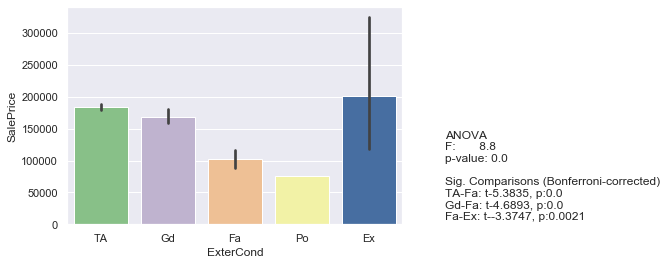

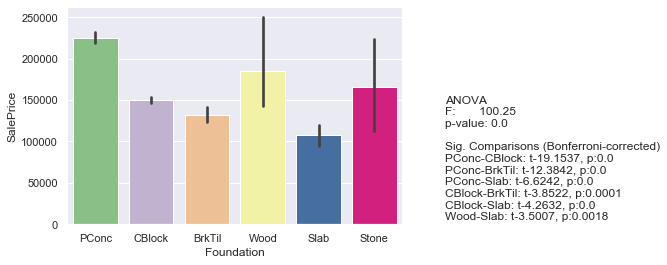

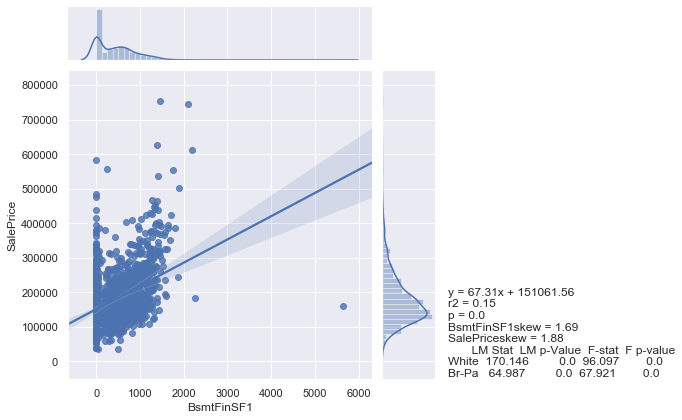

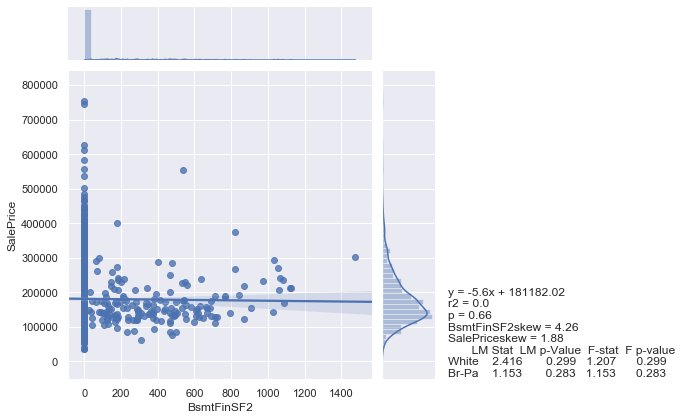

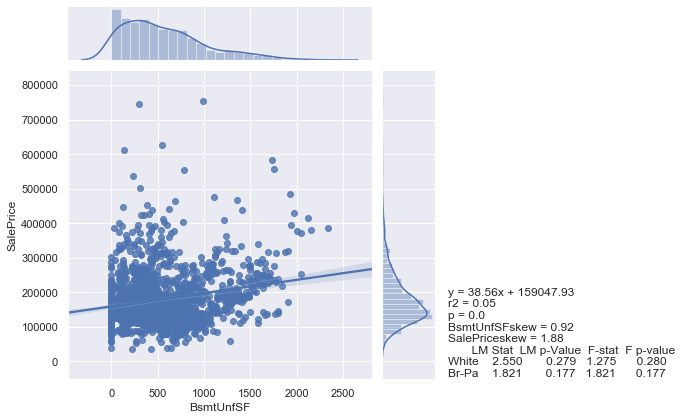

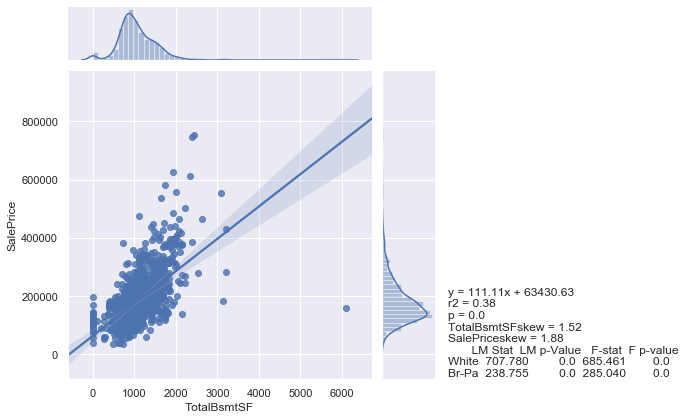

'GasA' n -1428; 'Floor' n-1 no test was preformed
'GasW' n -18; 'Floor' n-1 no test was preformed
'Grav' n -7; 'Floor' n-1 no test was preformed
'Wall' n -4; 'Floor' n-1 no test was preformed
'OthW' n -2; 'Floor' n-1 no test was preformed


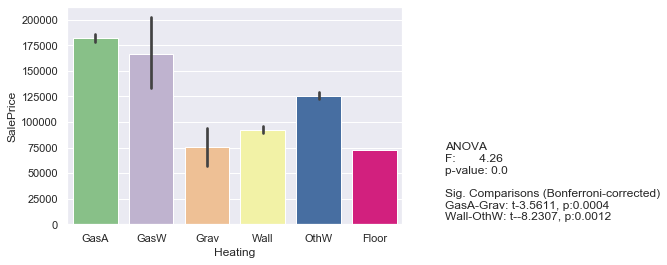

'Ex' n -741; 'Po' n-1 no test was preformed
'Gd' n -241; 'Po' n-1 no test was preformed
'TA' n -428; 'Po' n-1 no test was preformed
'Fa' n -49; 'Po' n-1 no test was preformed


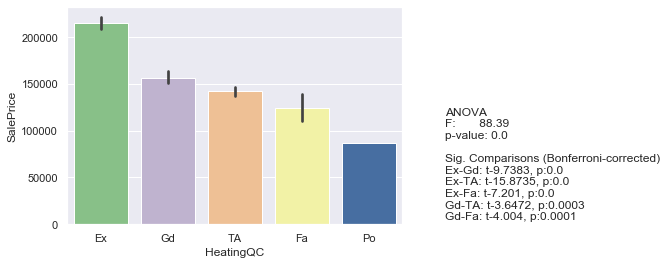

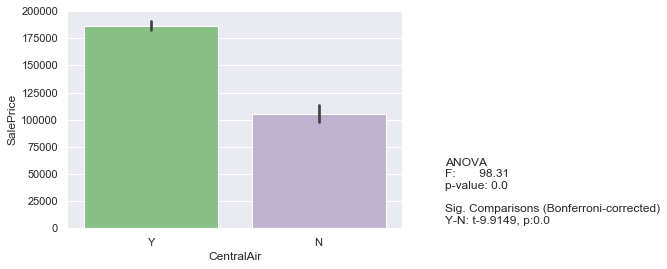

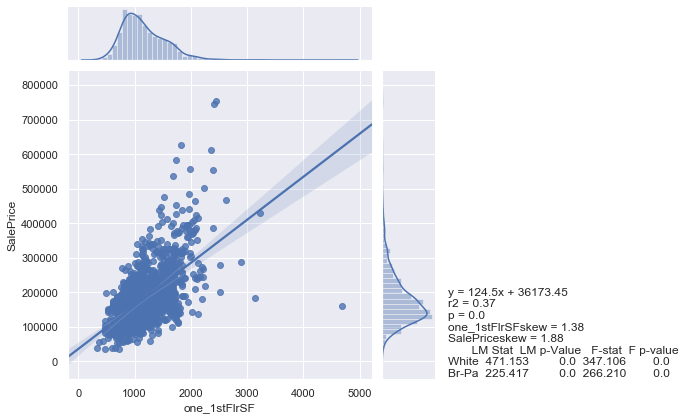

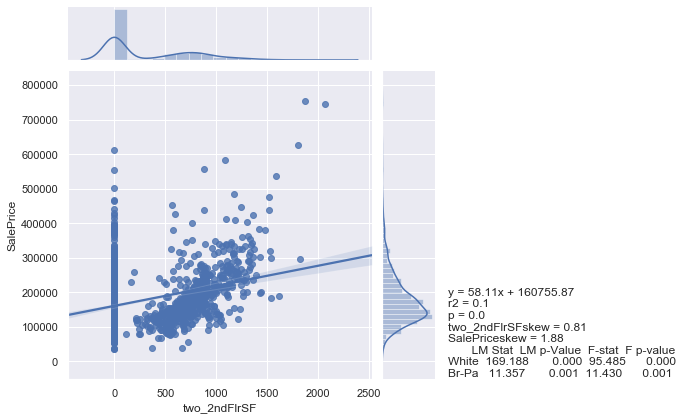

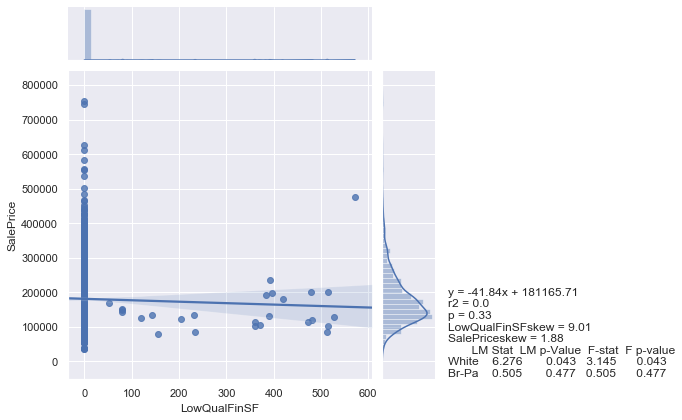

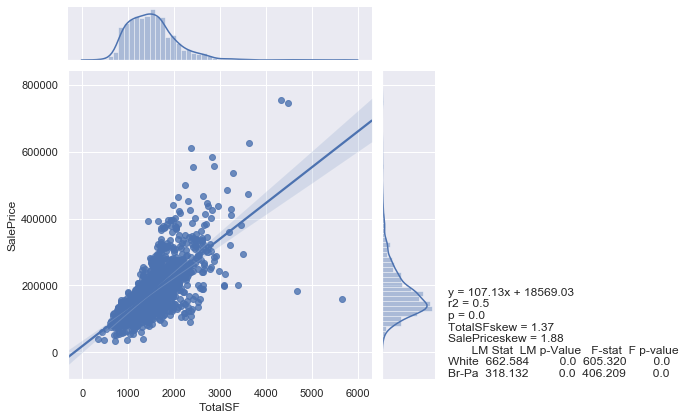

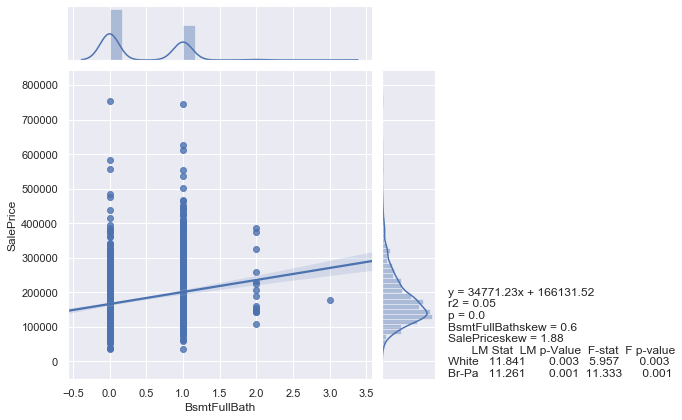

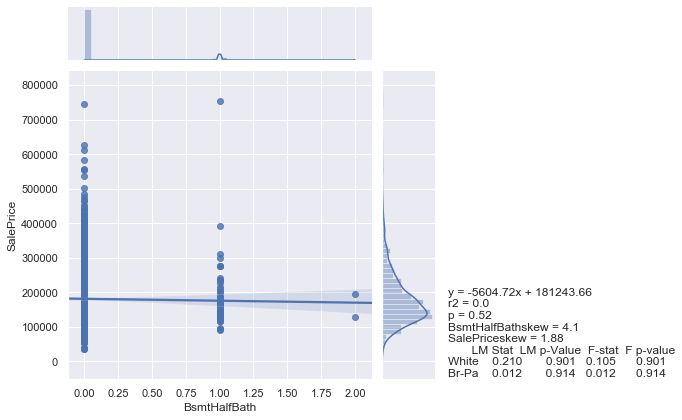

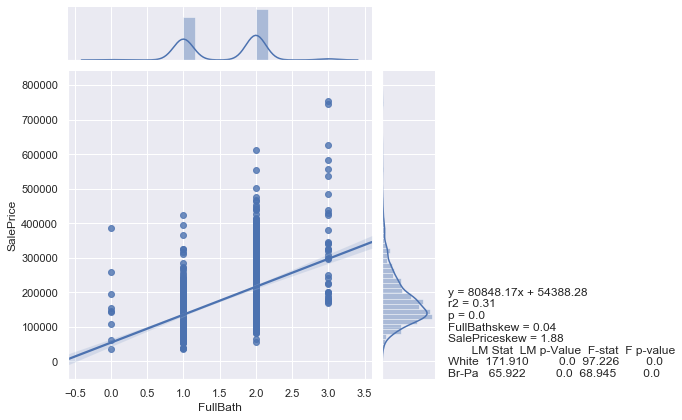

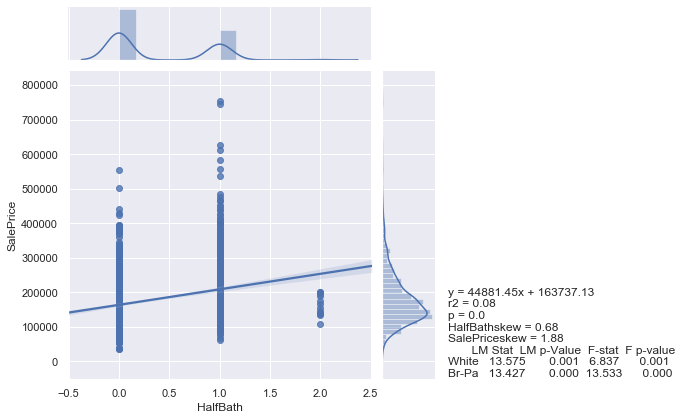

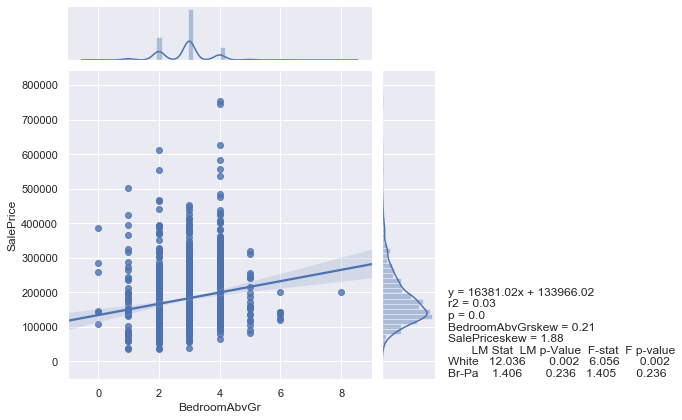

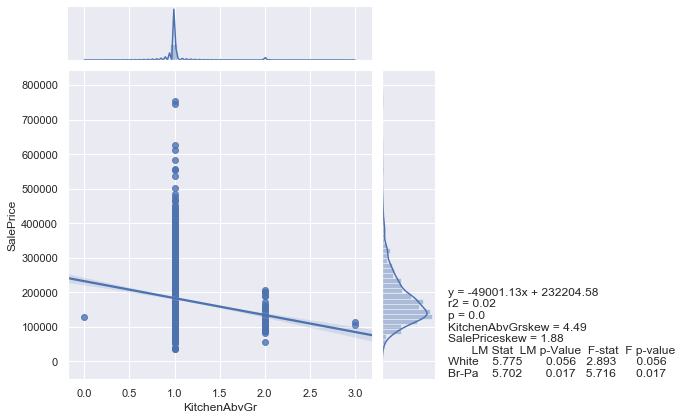

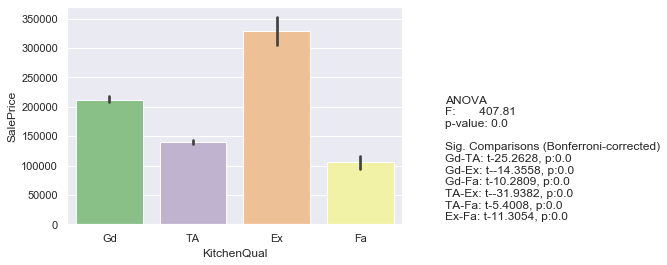

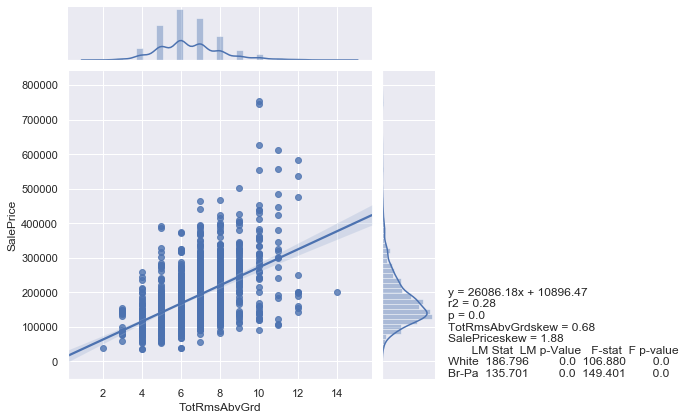

'Typ' n -1360; 'Sev' n-1 no test was preformed
'Min1' n -31; 'Sev' n-1 no test was preformed
'Maj1' n -14; 'Sev' n-1 no test was preformed
'Min2' n -34; 'Sev' n-1 no test was preformed
'Mod' n -15; 'Sev' n-1 no test was preformed
'Maj2' n -5; 'Sev' n-1 no test was preformed


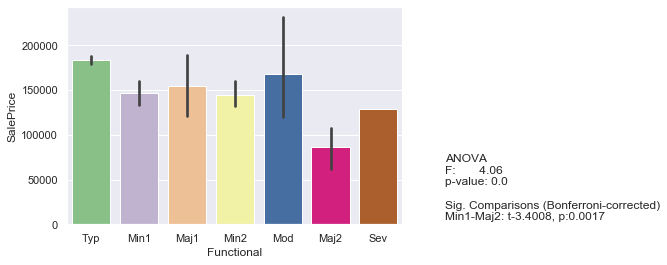

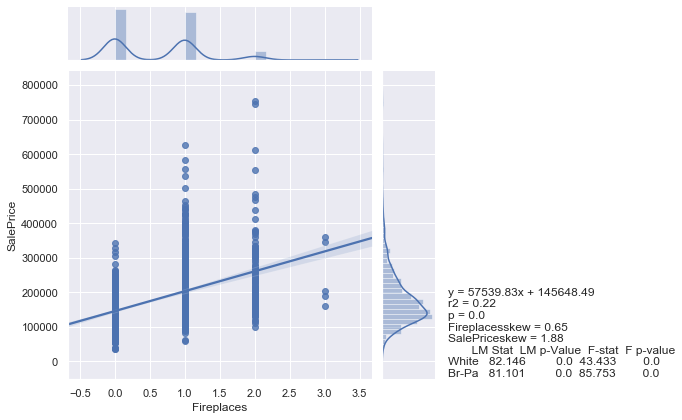

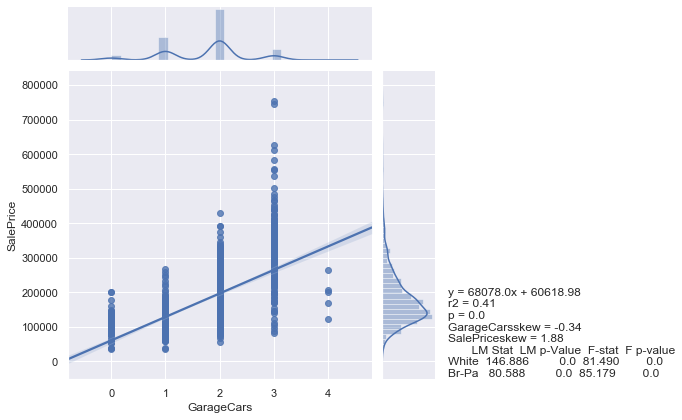

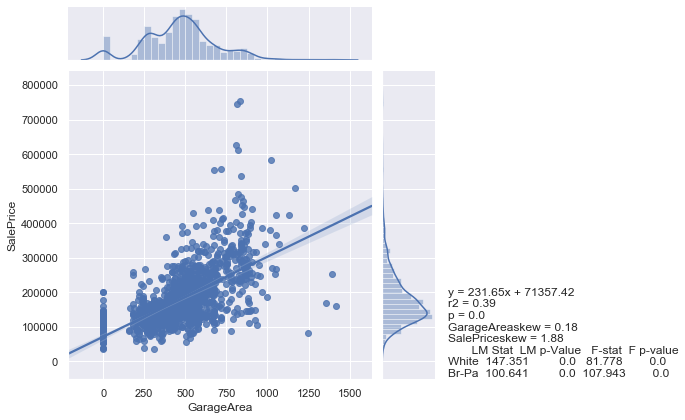

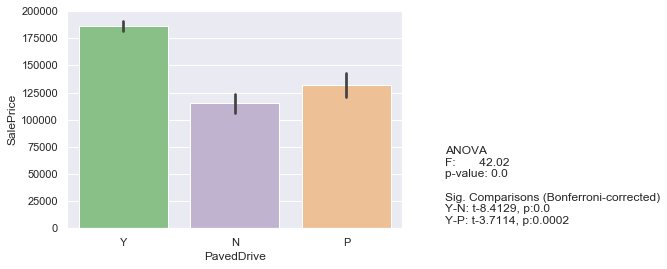

In [ ]:
def bivarstats(dataset, label):
    from scipy import stats
    #import pandas as pd
    
    output = pd.DataFrame(columns = ['Stat', '+/-', 'Effect Size', 'p-value'])
    
    for col in dataset:
        if not col == label:
            if dataset[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(dataset[col]):
                    r, p = stats.pearsonr(dataset[label], dataset[col])
                    output.loc[col] = ['r', np.sign(r), abs(round(r, 6)), round(p, 6)]
                    scatter(dataset[col], dataset[label])
                else: 
                    F, p = anova(dataset[[col, label]], col, label)
                    output.loc[col] = ['F', '', round(F, 6), round(p, 6)]
                    bar_Chart(dataset, col, label)
            else: 
                output.loc[col] = [np.nan, np.nan, np.nan, 'nulls']
    
    return output.sort_values(by = ['Stat', 'Effect Size'], ascending = [False, False])   
    #return output.reindex(output.r.abs().sort_values(ascending = False).index)

#dataset = pd.read_csv('http://www.ishelp.info/data/housing_full.csv')
bivarstats(HDat, 'SalePrice')


 ###### **Figures 8x.** *Scatter and bar charts of all variables in dataset.*

### E) Multivariate Statistics
In constrast to the previous section, in this part of the notebook we analyze more than two variables simultanously. The process is divided in four parts.

#### Data Preparation.
In this the data is prepared for the multivariate statistics.

In [ ]:
def mirPrep(df, label):
    for col in df:
        if not pd.api.types.is_numeric_dtype(df[col]):
            df = df.join(pd.get_dummies(df[col], prefix = col, drop_first = False))

    df = df.select_dtypes(np.number)
    dfMinMax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns = df.columns)
    return dfMinMax

data2 = pd.read_csv('http://www.ishelp.info/data/housing_full.csv')
data2 = basic_Clean(data2) ## HDat
df = mirPrep(data2,'SalePrice') ##data 2  basic clean + multivar

A For loop is executed where we get the dummy variables of every columns where the values are not numeric, we add the dummy variables to our dataFrame. 
In the second block we select all the data in all the columns where the values are numeric. Lastly we save in "dfMinMax" we standardize features by removing the mean and scaling to unit variance and we fit to data in dataFrame, then transform it.

#### Ordinary Least Squares

In this function we exceute the Ordianry Least Squares where our endog = y, and exog = x, where y is the Sales Price and y is the dataFrame minus Sales Price.

In [ ]:
def mir(df, label):
    y = df[label]
    x = df.drop(columns = [label]).assign(const = 1)
    #x.head()
    output = sm.OLS(y, x).fit()
    return output#.summary()

results = mir(df, 'SalePrice')

#### Dataset Features

In this function block we create a dataFrame from a dictornary. In coef the parameters of results are stored, in t the t-vales of results, and in p the p values.

In [ ]:
def mirFeat(results):
    dfFeatures = pd.DataFrame({'coef': results.params, 't':abs(results.tvalues), 'p':results.pvalues})
    dfFeatures.drop(labels =['const'], inplace=True)
    dfFeatures = dfFeatures.sort_values(by=['t', 'p'])
    return dfFeatures
dfFeatures = mirFeat(results)

### Fit
We excecute the mirFeat() function with in this function block. Then we save the difference actual values with the fitted values. Later we get the Root-mean-square deviation (RMSE) of the residuals vs the actual, and the Mean Absolute Error (MAE) of the actual vs results.

In [ ]:
def mirFit(results, actual, roundto=10):
    dfFeatures = mirFeat(results)
    residuals = np.array(actual) - np.array(results.fittedvalues)
    rmse = np.sqrt(sum(residuals**2)/len(actual))
    mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))
    fitStats = [round(results.rsquared, roundto), round(results.rsquared_adj, roundto), 
                round(results.rsquared - results.rsquared_adj, roundto), round(rmse, roundto), 
                round(mae, roundto), [dfFeatures.index.values]]
    return fitStats
fitMetrics = mirFit(results, df['SalePrice']) 
fitMetrics

In [ ]:
def mirStep(df, label, min=2):
    dfModels = pd.DataFrame(columns=['R2', 'R2a', 'diff', 'RSME', 'MAE', 'feature'])
    df = mirPrep(df, label)
    
    results = mir(df, label)
    
    dfModels.loc[str(len(results.params))] = mirFit(results, df[label], 10)
    dfFeatures = mirFeat(results)
    
    while len(results.params) >= min:
        df = df.drop(columns=[dfFeatures.index[0]])
        results = mir(df, label)
        dfFeatures = mirFeat(results)
        dfModels.loc[len(results.params)] = mirFit(results, df[label], 10)
        
    #dfModels.to_csv('./Music/Portfolio/HousePrices/' + label +'.csv')
    dfModels.to_csv('filename.csv')
    #dfModels.drop(columns = ['features'], inplace = True)
    return dfModels

dfModels = mirStep(df, 'SalePrice', 2)

***
## **E) M O D E L S**
In the following section we will train, model and evaluate 4 diferent methods: linear regresson, Random Forest Regressor, XHGHOST, and SVM Regressor.

In [ ]:
# Spliting target variable and independent variables
X = df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']

In [ ]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

## **1) Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

# Value of y intercept
print(lm.intercept_)

#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

# Model prediction on train data
y_pred = lm.predict(X_train)

#### Model Evaluation
In this section we will evaluate with these metrics: <br>
**𝑅^2** : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable. <br>
**Adjusted 𝑅^2** :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.<br>
**MAE** : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. <br>
**MSE:** The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. <br>
**RMSE:** The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. <br>

In [ ]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

#### Plots

In [ ]:
plt.figure(figsize=(18,5))

# Visualizing the differences between actual prices and predicted values
ax1 = plt.subplot(1,3,1)
ax1.set_title("Prices vs Predicted prices") 
ax1 = sns.scatterplot( x=y_train, y=y_pred)

ax1.set_xlabel("Prices")
ax1.set_ylabel("Predicted prices")

# Checking residuals
ax2 = plt.subplot(1,3,2)
ax2 = sns.scatterplot(x=y_pred, y=y_train-y_pred)
ax2.set_title("Predicted vs residuals")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Residuals")

# Checking Normality of errors
ax3 = plt.subplot(1,3,3)
ax3 = sns.distplot(y_train-y_pred)
ax3.set_title("Histogram of Residuals")
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Residuals")
plt.show()

###### **Figure 9.** Plots for Linear Regresson Model

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied. Here the residuals are normally distributed. So normality assumption is satisfied

### For test data

In [ ]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

A not so go result.

## **2) Random Forest Regressor**

#### Train the model

In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

#### Model Evaluation

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

#### Plot

In [ ]:
plt.figure(figsize=(18,5))

# Visualizing the differences between actual prices and predicted values
ax1 = plt.subplot(1,3,1)
ax1.set_title("Prices vs Predicted prices") 
ax1 = sns.scatterplot( x=y_train, y=y_pred)

ax1.set_xlabel("Prices")
ax1.set_ylabel("Predicted prices")

# Checking residuals
ax2 = plt.subplot(1,3,2)
ax2 = sns.scatterplot(x=y_pred, y=y_train-y_pred)
ax2.set_title("Predicted vs residuals")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Residuals")

# Checking Normality of errors
ax3 = plt.subplot(1,3,3)
ax3 = sns.distplot(y_train-y_pred)
ax3.set_title("Histogram of Residuals")
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Residuals")
plt.show()

###### **Figure 9.** Plots for Randmom Forrest Regressor Model

#### For test data

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

# Model Evaluation
acc_rfr = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rfr)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

## **3) XGBoost Regressor**

#### Training the model<br>

In [ ]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

#### Model Evaluation

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

#### Plot

In [ ]:
plt.figure(figsize=(18,5))

# Visualizing the differences between actual prices and predicted values
ax1 = plt.subplot(1,3,1)
ax1.set_title("Prices vs Predicted prices") 
ax1 = sns.scatterplot( x=y_train, y=y_pred)

ax1.set_xlabel("Prices")
ax1.set_ylabel("Predicted prices")

# Checking residuals
ax2 = plt.subplot(1,3,2)
ax2 = sns.scatterplot(x=y_pred, y=y_train-y_pred)
ax2.set_title("Predicted vs residuals")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Residuals")

# Checking Normality of errors
ax3 = plt.subplot(1,3,3)
ax3 = sns.distplot(y_train-y_pred)
ax3.set_title("Histogram of Residuals")
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Residuals")
plt.show()

###### **Figure 10.** Plots for XGBoot Regressor Model

#### For test data

In [ ]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

## 4) **SVM Regressor**

**C :** float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. <br>
**kernel :** string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.<br>
**degree :** int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.<br>
**gamma :** float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.<br>
**coef0 :** float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.<br>
**shrinking :** boolean, optional (default=True): Whether to use the shrinking heuristic.<br>

In [ ]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train the model

In [ ]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [ ]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

#### Model Evaluation

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

#### Plots

In [ ]:
plt.figure(figsize=(18,5))

# Visualizing the differences between actual prices and predicted values
ax1 = plt.subplot(1,3,1)
ax1.set_title("Prices vs Predicted prices") 
ax1 = sns.scatterplot( x=y_train, y=y_pred)

ax1.set_xlabel("Prices")
ax1.set_ylabel("Predicted prices")

# Checking residuals
ax2 = plt.subplot(1,3,2)
ax2 = sns.scatterplot(x=y_pred, y=y_train-y_pred)
ax2.set_title("Predicted vs residuals")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Residuals")

# Checking Normality of errors
ax3 = plt.subplot(1,3,3)
ax3 = sns.distplot(y_train-y_pred)
ax3.set_title("Histogram of Residuals")
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Residuals")
plt.show()

###### **Figure 11.** Plots for SVM Regressor Model

#### For test data

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

## **F) MODEL EVALUATION**

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rfr*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))
ax = sns.lineplot(dfModels.index, dfModels.R2)
ax = sns.lineplot(dfModels.index, dfModels.R2a)
ax.set(ylim=(0.88, 0.921))